In [31]:
import requests
import json
import pandas as pd


# import style dims
url = 'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/style_dims_names.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims_names = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

# import fighter data
all_fighter_data = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true')


#import fihgt styles dims
fighters_styles_dims = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/fighters_styles_dims.csv')


Data loaded successfully:


In [ ]:
# aggregate data at the fighter level


In [2]:
# import numpy as np
# from ydata_profiling import ProfileReport

# # profile report
# profile = ProfileReport(fighter_df, minimal=True)
# profile.to_file(r"C:\Users\johna\anaconda3\envs\ufc-env\ufc_styles\data\03_reports\fighter_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fighters_styles_dims_copy = fighters_styles_dims.copy()
fighters_styles_dims_copy.loc[:, style_dims] = scaler.fit_transform(fighters_styles_dims_copy[style_dims_names])
fighters_styles_dims = fighters_styles_dims_copy


In [5]:
# weight_class = list(fighter_df['weight_class'].drop_duplicates())
# weight_class

['Featherweight',
 'WomenBantamweight',
 'WomenFlyweight',
 'Welterweight',
 'Bantamweight',
 'Middleweight',
 'Flyweight',
 'Lightweight',
 'Heavyweight',
 'CatchWeight',
 'WomenStrawweight',
 'LightHeavyweight',
 'WomenFeatherweight']

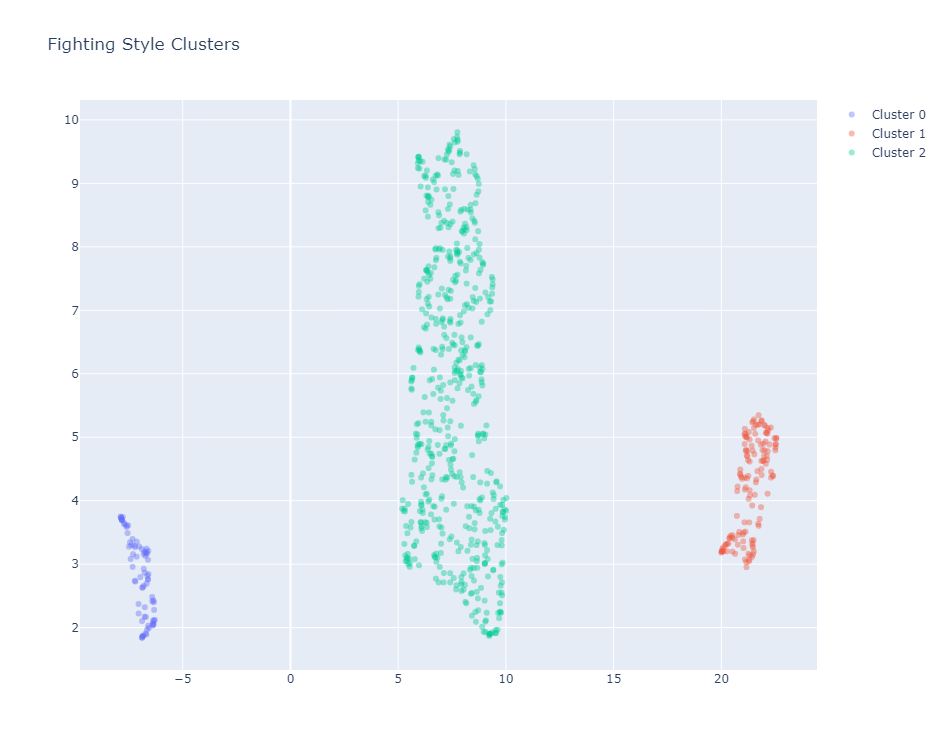

In [12]:
from scripts.cluster import ClusterAnalysis

ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Featherweight'], n_neighbors=10, min_cluster_size=10, min_dist=0.10, metric='euclidean', cluster_dims=style_dims)
ca.run()


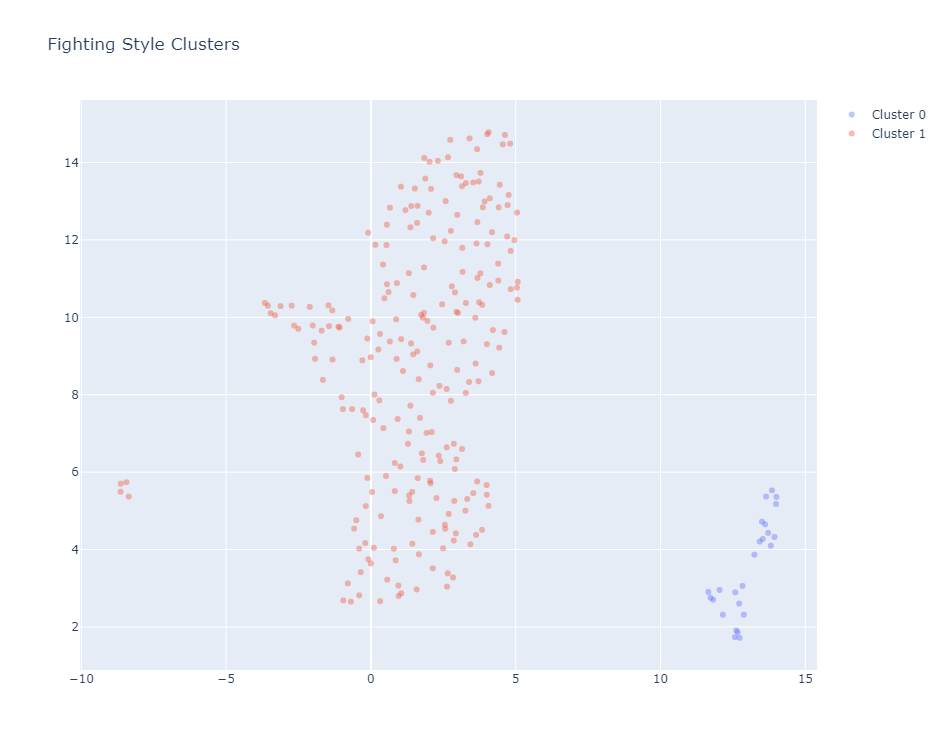

In [15]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'WomenBantamweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

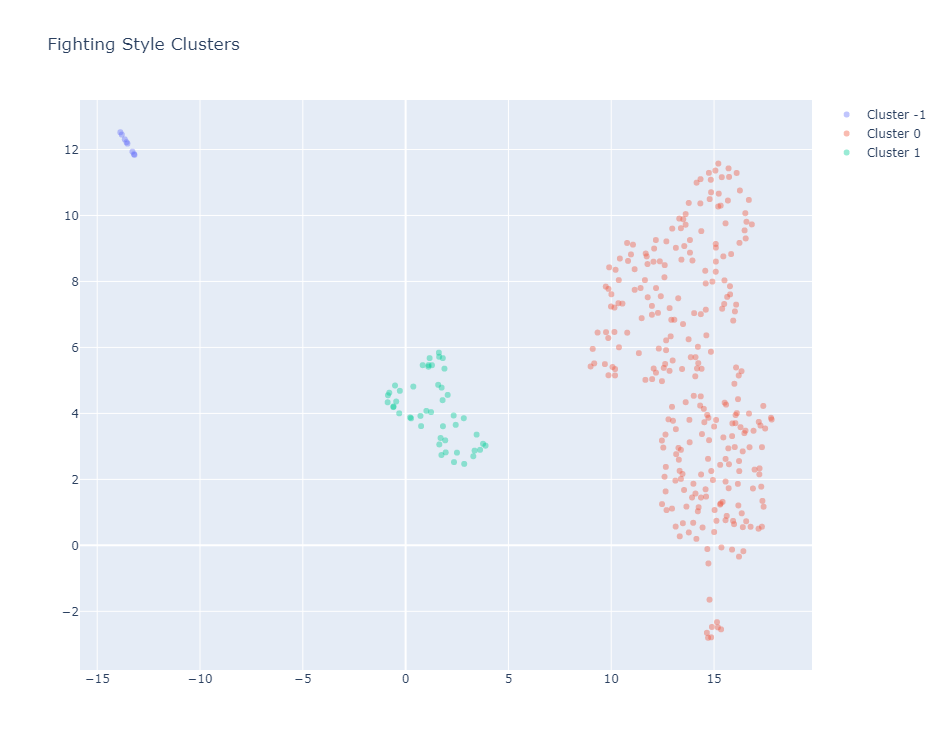

In [16]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'WomenFlyweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

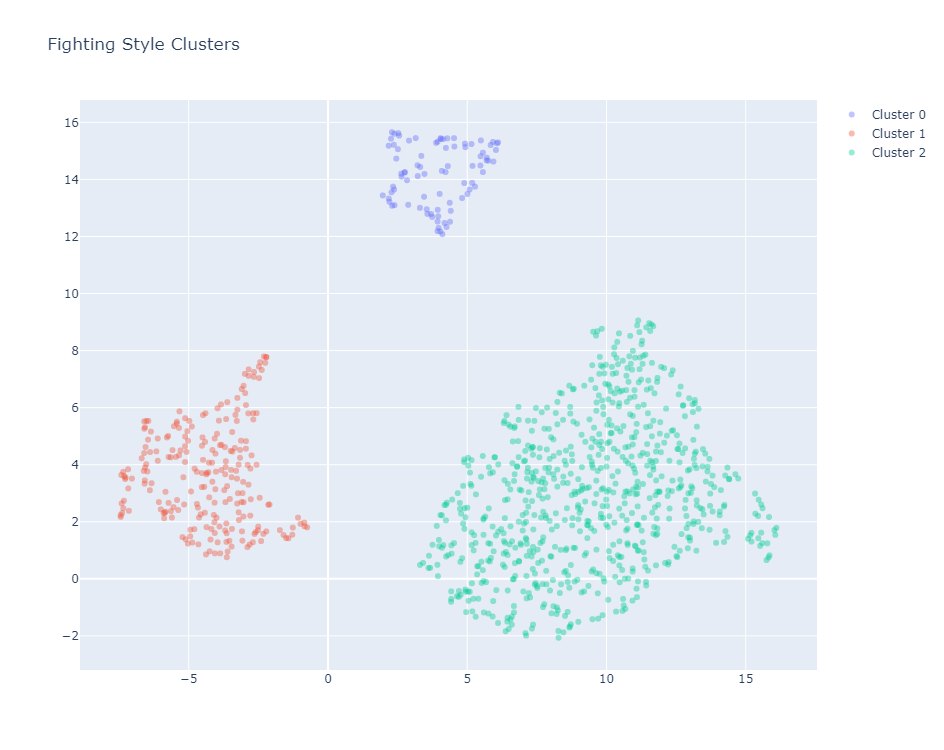

In [17]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Welterweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

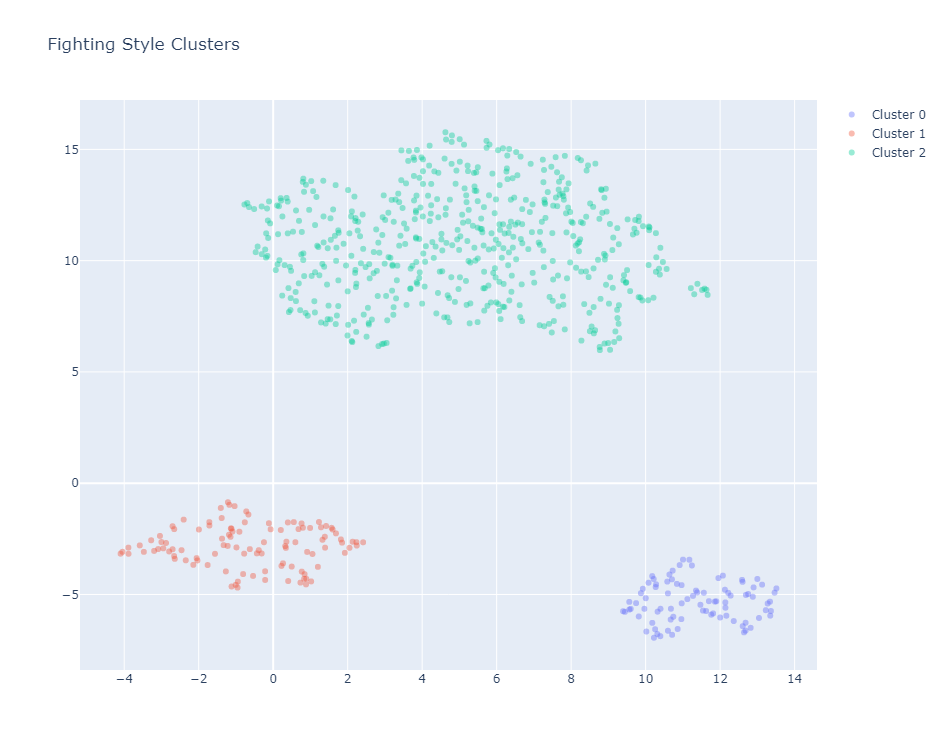

In [18]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Bantamweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

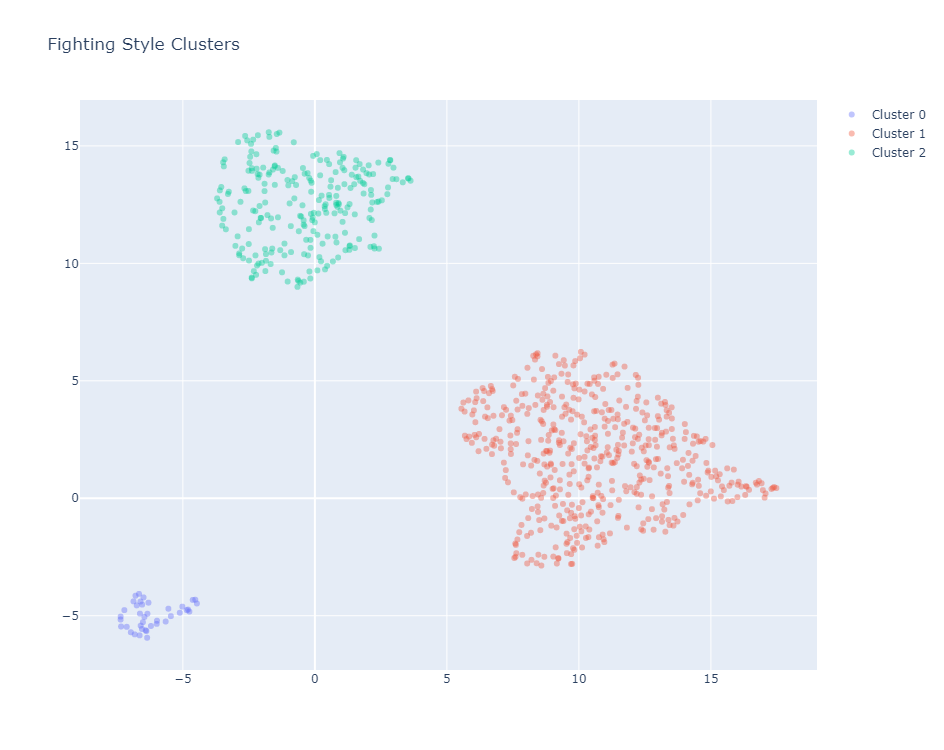

In [19]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Middleweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

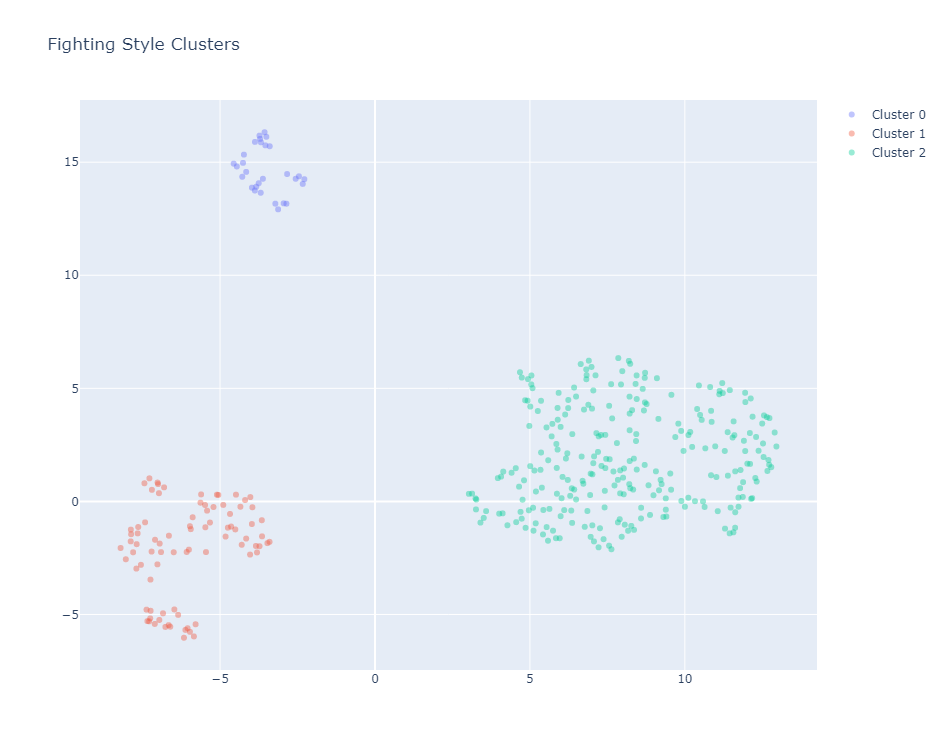

In [20]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Flyweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

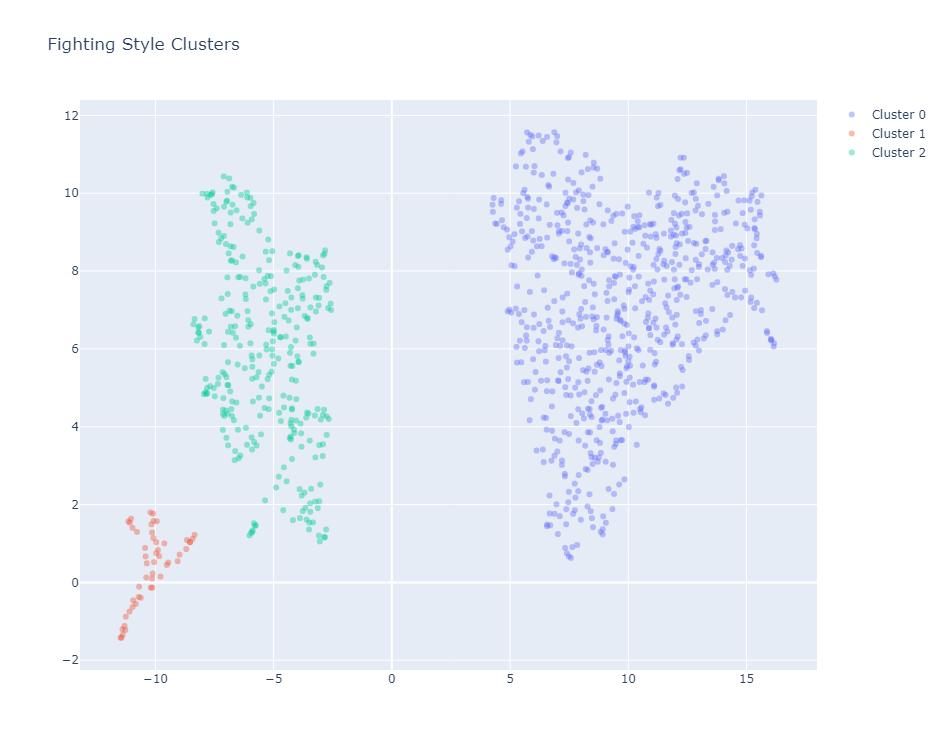

In [21]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Lightweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

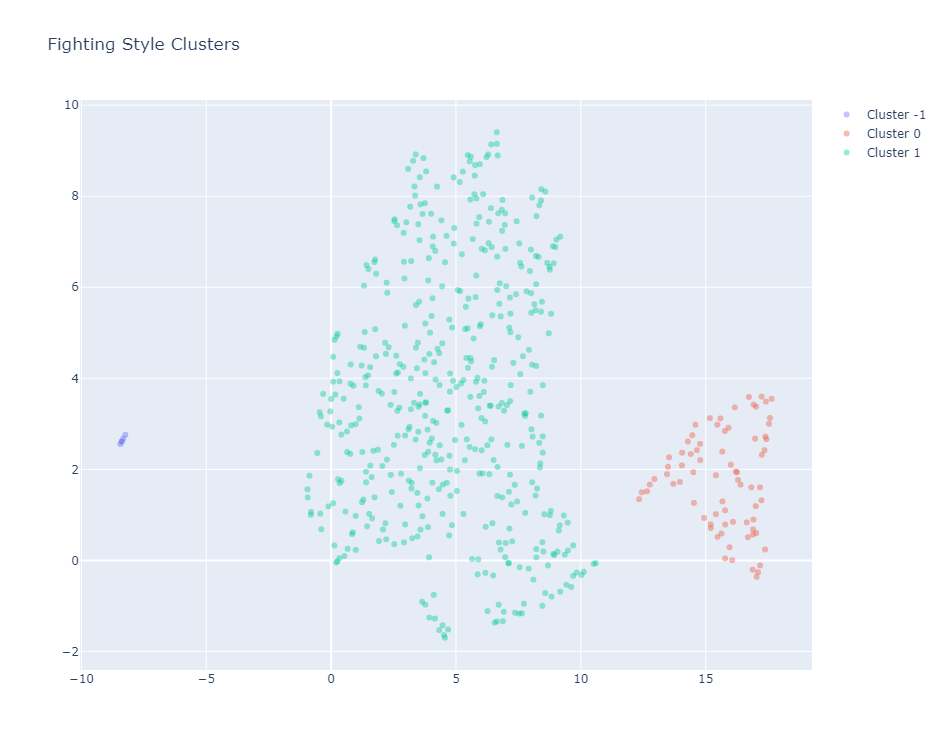

In [22]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'Heavyweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

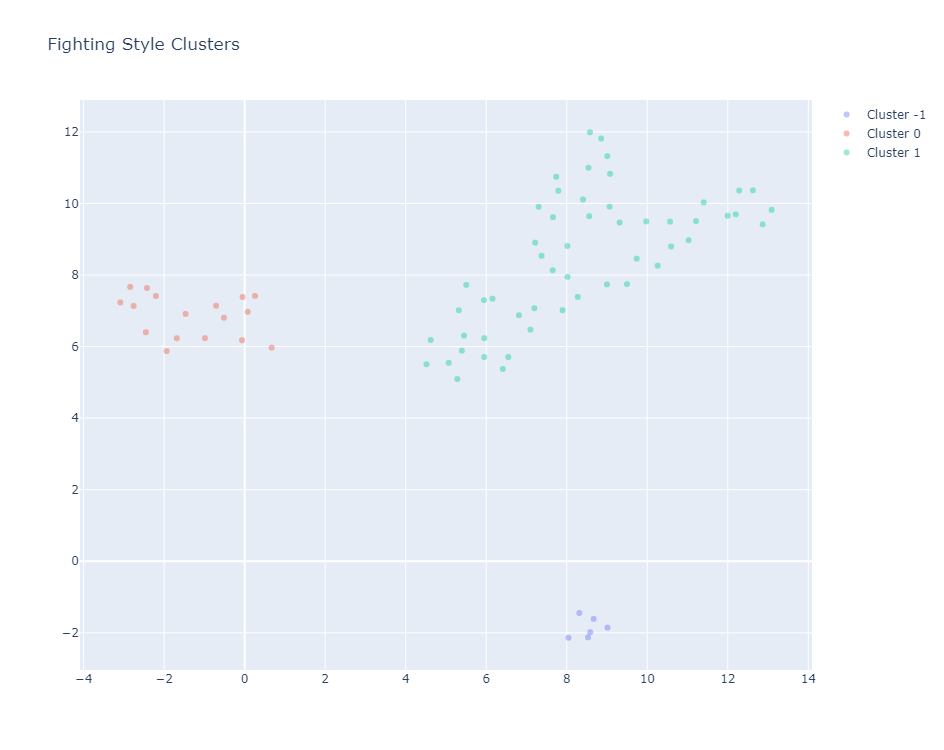

In [23]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'CatchWeight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

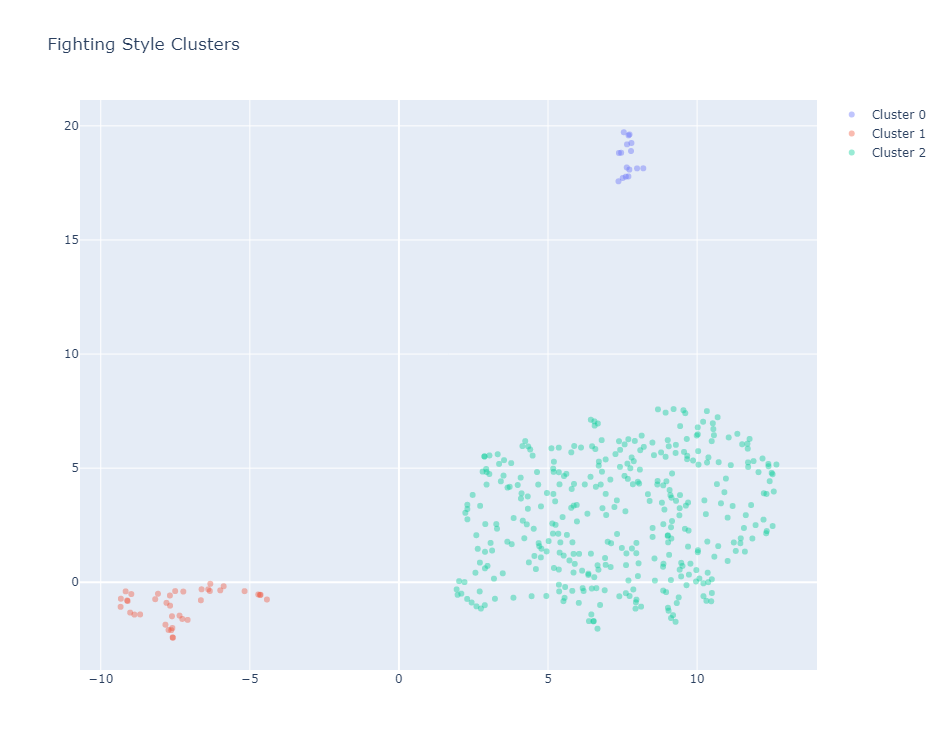

In [24]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'WomenStrawweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

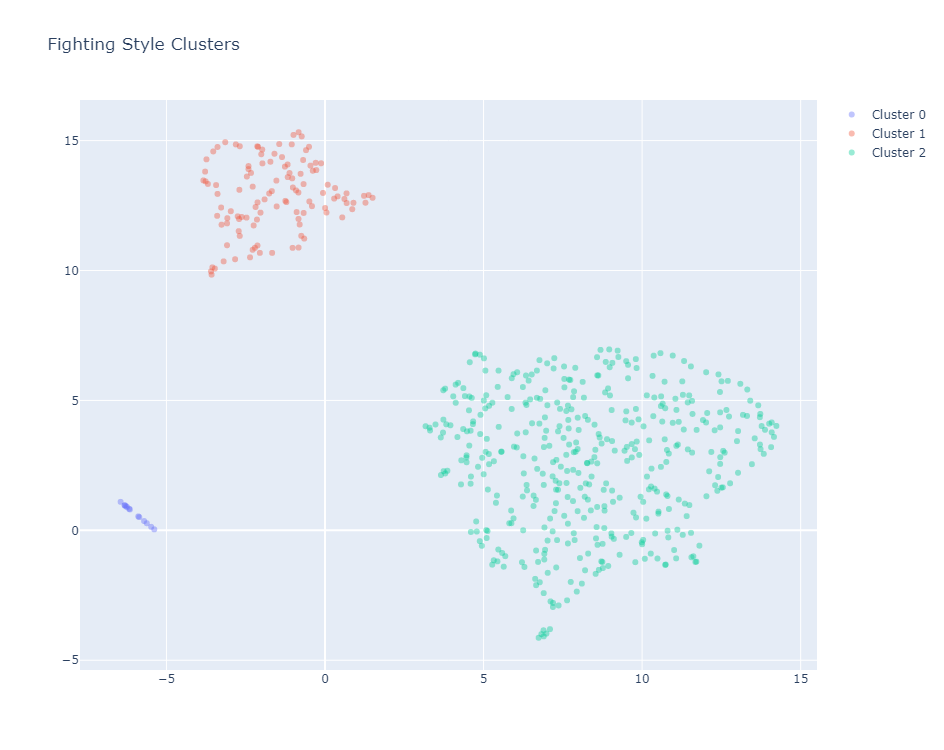

In [25]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'LightHeavyweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()

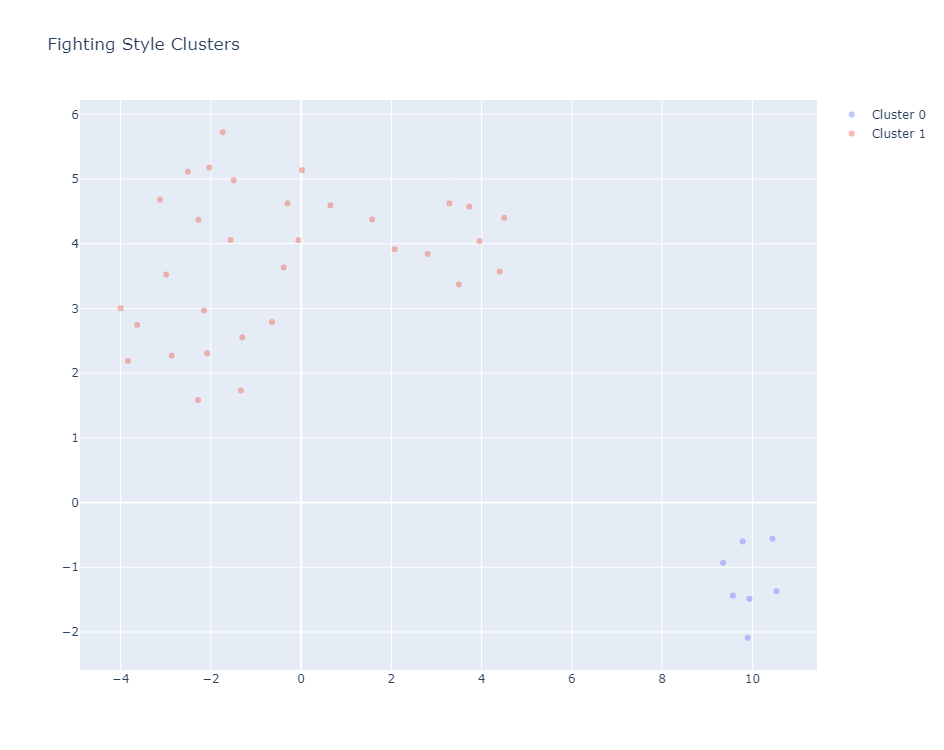

In [28]:
ca = ClusterAnalysis(fighter_df.loc[fighter_df['weight_class'] == 'WomenFeatherweight'], n_neighbors=5, min_cluster_size=5, min_dist=0.5, metric='euclidean', cluster_dims=style_dims)
ca.run()